In [1]:
import cv2
import matplotlib
import numpy as np

### Read and Save Images

#### Imread functions in OpenCV

In [2]:
# 1 denotes color image
original_img = cv2.imread('puppy.jpeg',1)
cv2.imshow('Puppy',original_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# 0 denotes grayscale image
img = cv2.imread('puppy.jpeg',0)
cv2.imshow('Puppy',img)
cv2.waitKey()
cv2.destroyAllWindows()

#### Imwrite function in OpenCV

In [4]:
# save image
status = cv2.imwrite('saved.jpeg',img=img)
print('Image written success?:',status)

Image written success?: True


### Basic Operations on Images

#### Access pixel values and modify them

In [10]:
img = original_img
# access a single pixel
px = img[100,100]
# prints all channels pixel value in BGR format
print("Access all channels:",px)
# access only blue pixel
blue = px[0]
print('Blue channel:',blue)
# modify a pixel value
img[100,100] = [255,255,255]
print('Modified pixel values:',img[100,100])

Access all channels: [222 213 210]
Blue channel: 222
Modified pixel values: [255 255 255]


#### Access Image properties

In [6]:
print('Image shape (rows, cols, channels):',img.shape)
print('Image size:',img.size)
print("Image datatype:",img.dtype)


Image shape (rows, cols, channels): (1706, 2560, 3)
Image size: 13102080
Image datatype: uint8


#### Splitting and Merging Image Channels

In [14]:
# splitting into BGR channels
b,g,r = cv2.split(img)
# merge all channels
img = cv2.merge((b,g,r))
# set all red channels to zero
img[:,:,2] = 0

### OpenCV Resize Image

In [17]:
img = original_img
print('Original shape:',img.shape)
img_resized = cv2.resize(img, (780,540),interpolation=cv2.INTER_NEAREST)
print('Resized image shape:',img_resized.shape)
cv2.imshow('Resized Image',img_resized)
cv2.waitKey()
cv2.destroyAllWindows()

Original shape: (1706, 2560, 3)
Resized image shape: (540, 780, 3)


### OpenCV Image Rotation

#### Rotate using pre-defined angles

In [18]:
img = original_img
# rotate by 90 degrees counter-clockwise
img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imshow('Rotated image',img_rotated)
cv2.waitKey()
cv2.destroyAllWindows()

#### Rotate using custom angles

In [19]:
img = original_img
# get image height and width
(h,w) = img.shape[:2]
# calculate center of image
center = (w/2,h/2)
scale = 1.0

# perform the counter clockwise rotation holding at the center
# 45 degrees
M = cv2.getRotationMatrix2D(center=center, scale=scale, angle=45)
print("45 degree:",M)
img_rotated45 = cv2.warpAffine(img, M, (w,h))
# 110 degrees
M = cv2.getRotationMatrix2D(center=center, scale=scale, angle=110)
print("110 degree:",M)
img_rotated110 = cv2.warpAffine(img, M, (w,h))
# 150 degrees
M = cv2.getRotationMatrix2D(center=center, scale=scale, angle=150)
print("150 degree:",M)
img_rotated150 = cv2.warpAffine(img, M, (w,h))

# display all images
cv2.imshow('Original Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('Rotated 45 Image',img_rotated45)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('Rotated 110 Image',img_rotated110)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('Rotated 150 Image',img_rotated150)
cv2.waitKey(0)
cv2.destroyAllWindows()

45 degree: [[ 7.07106781e-01  7.07106781e-01 -2.28258764e+02]
 [-7.07106781e-01  7.07106781e-01  1.15493460e+03]]
110 degree: [[-3.42020143e-01  9.39692621e-01  9.16227978e+02]
 [-9.39692621e-01 -3.42020143e-01  2.34754974e+03]]
150 degree: [[-8.66025404e-01  5.00000000e-01  1.96201252e+03]
 [-5.00000000e-01 -8.66025404e-01  2.23171967e+03]]


### OpenCV Drawing Functions

#### Drawing a circle

In [23]:
img = original_img
# draw a circle
cv2.circle(img, (1280,853), 200, (0,255,0), -1)
cv2.imshow('Image with circle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Drawing a rectangle

In [25]:
img = original_img
# draw a rectangle
cv2.rectangle(img, (15,25),(200,150),(0,255,255),15)
cv2.imshow('Image with rectangle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Drawing Lines

In [27]:
img = original_img
# defining points for polylines
pts = np.array([[100,150],[200,300],[700,200],[500,100]],np.int32)
cv2.polylines(img, [pts],True,(0,255,255),3)
cv2.imshow('Image with lines',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Write text on an Image

In [28]:
img = original_img
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Dog',(10,500),font,1,(255,255,255),2)
cv2.imshow('Image with text',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### OpenCV Blob Detection

#### Using SimpleBlobDetector()

In [4]:
img = original_img
# set up the detector with default parameters
detector = cv2.SimpleBlobDetector_create()
# detecting blobs
keypoints = detector.detect(img)
# draw detected blobs as red circles
img_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# show keypoints
cv2.imshow('Image with blobs keypoints',img_keypoints)
cv2.waitKey(0)

97

#### Using SimpleBlobDetector with filters

In [5]:
img = original_img
# set up SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# filter by area
params.filterByArea = True
params.minArea = 1500

# filter by circularity
params.filterByConvexity = True
params.minConvexity = 0.87

# filter by inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# detect blobs
keypoints = detector.detect(img)

# draw detected blobs as red circles
img_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# show blobs
cv2.imshow('Image with blobs keypoints',img_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Canny Edge Detection

#### Edge detection on image

In [10]:
img = original_img
# detect edges
edges = cv2.Canny(img, 50, 200, True)
cv2.imshow('Edge Detected Image',edges)
cv2.imshow('Original Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Edge detection through live camera

In [23]:
# capture frames from a camera
cap = cv2.VideoCapture(0)
# loop runs if capturing has been initialized
while cap.isOpened():
    # read frames from a camera
    ret, frame = cap.read()
    # display an original image
    cv2.imshow('Original',frame)

    # discover edges in the input image and mark in output map edges
    edges = cv2.Canny(frame, 50, 200, True)

    # display edges in a frame
    cv2.imshow('Edges',edges)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# close the window
cap.release()
# de-allocate any associated memory usage
cv2.destroyAllWindows()

: 

### OpenCV Image Smoothing

#### OpenCV averaging

In [5]:
img = original_img
cv2.imshow('Original Image',img)
cv2.imshow('cv2.blur output',cv2.blur(img, (2,2)))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### OpenCV median blur

In [6]:
img = original_img
cv2.imshow('Original Image',img)
cv2.imshow('cv2.medianBlur output',cv2.medianBlur(img, 5))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### OpenCV Gaussian blur

In [7]:
img = original_img
cv2.imshow('Original Image',img)
cv2.imshow('cv2.GaussianBlur output',cv2.GaussianBlur(img, (5,5),cv2.BORDER_DEFAULT))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### OpenCV Bilateral Filter

In [8]:
img = original_img
cv2.imshow('Original Image',img)
cv2.imshow('Bilateral Image',cv2.bilateralFilter(img, 9, 75, 75))
cv2.waitKey(0)
cv2.destroyAllWindows()

### OpenCV Image Threshold

#### Simple Thresholding

In [11]:
img = original_img
# first convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = 160
ret, thres1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(img, threshold, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO_INV)
# the window showing output images
cv2.imshow('Original',img)
cv2.imshow('Binary Threshold',thres1)
cv2.imshow('Binary Threshold Inverted',thres2)
cv2.imshow('Truncated Threshold',thres3)
cv2.imshow('Zero Threshold',thres4)
cv2.imshow('Zero Inverted',thres5)
# de-allocate any associated memory usage
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Adaptive Thresholding

In [13]:
img = original_img
# first convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = 160
ret, thres1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thres3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# the window showing output images
cv2.imshow('Original',original_img)
cv2.imshow('Binary Threshold',thres1)
cv2.imshow('Adaptive Threshold',thres2)
cv2.imshow('Gaussian Adaptive Threshold',thres3)
# de-allocate any associated memory usage
cv2.waitKey(0)
cv2.destroyAllWindows()

### OpenCV Contours

In [23]:
img = original_img.copy()
# find canny edges
edges = cv2.Canny(img, 30, 200)
cv2.waitKey(0)

# find contours
# use copy of img, since findContour alters the image
edge_copy = edges.copy()
contours, hierarchy = cv2.findContours(edge_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Original',img)
cv2.imshow('Canny Edges After Contouring',edge_copy)
cv2.drawContours(img, contours, -1, (0,255,0), 3)
cv2.imshow('Contours',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### OpenCV Mouse Event

#### Mouse as a Paint Brush

In [24]:
mouse_events = [j for j in dir(cv2) if 'EVENT' in j]
display(mouse_events)

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

#### Draw Circle

In [26]:
# creating mouse callback function
def draw_circle(event, x, y, flags, param):
    if event==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y),50,(123,125,200),-1)
# create a black image, a window and bind the function to window
img = np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

### OpenCV Template Matching

In [29]:
from matplotlib import pyplot as plt

#### Single object

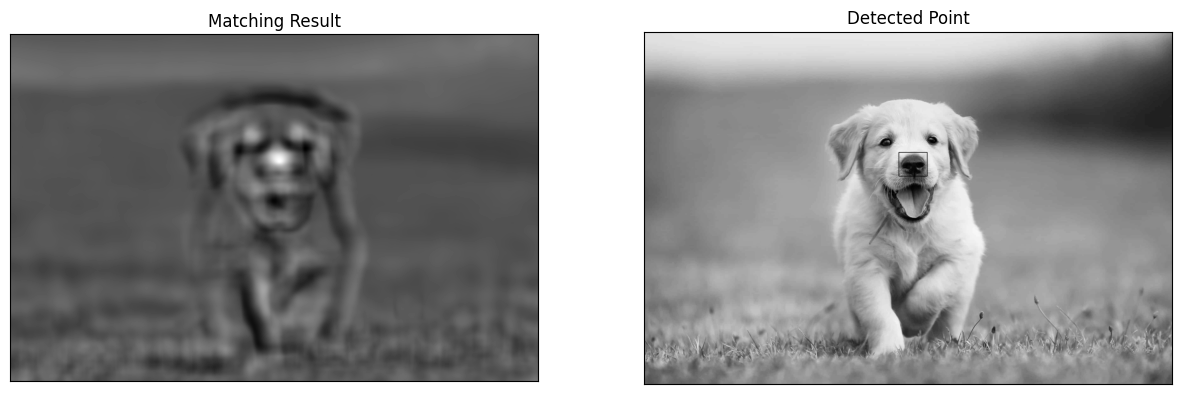

In [36]:
img = cv2.imread('puppy.jpeg',0)
img2 = img.copy()
template = cv2.imread('template.jpeg',0)
w,h = template.shape[::-1]
# all 6 methods for comparison in a list
# apply template matching
res = cv2.matchTemplate(img, template, eval('cv2.TM_CCOEFF'))
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# if method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, (0,255,255), 2)
plt.figure(figsize=(15,7))
plt.subplot(121),plt.imshow(res,cmap='gray')
plt.title('Matching Result'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap='gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

#### Multiple Objects

In [ ]:
img = cv2.imread('puppy.jpeg',1)
img_gray = cv2.imread('puppy.jpeg',0)
template = cv2.imread('template1.jpeg',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray, template, eval('cv2.TM_CCOEFF_NORMED'))
threshold = 0.52
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)
plt.figure(figsize=(15,7))
plt.subplot(121),plt.imshow(res,cmap='gray')
plt.title('Matching Result'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap='gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

### OpenCV Video Capture

#### Capture Video from Camera

In [44]:
cap = cv2.VideoCapture(0)
while True:
    # capture frame-by-frame
    ret, frame = cap.read()

    # operations on frame comes here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # display the resulting frame
    cv2.imshow('Frame',gray)

    # break from loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release capture
cap.release()
cv2.destroyAllWindows()

#### Saving a Video

In [56]:
cap = cv2.VideoCapture(0)

# define the codec and create VideoWriter object
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc('X','V','I','D')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (frame_width,frame_height))

while cap.isOpened():
    # capture frame-by-frame
    ret, frame = cap.read()
    
    if ret:
        # operations on frame comes here
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # write the modified frame
        out.write(gray)

        # display the resulting frame
        cv2.imshow('Frame',gray)

        # break from loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# release capture
cap.release()
out.release()
cv2.destroyAllWindows()